# Capítulo 1 - Básico sobre DataFrame do Pandas

Panda é uma biblioteca em Python que permite a manipulação de dados tipo planilha<br>
**Dataframe**: Representa dados de planilha ou retangulares completos<br>
**Serie**: Corresponde a uma coluna do dataframe

Para carregar o primeiro conjunto de código usaremos o método `read_csv(path, sep="\t"`. Por padrão o método read_csv separa so dados por ponto e virgula

In [2]:
import pandas as pd
path = "C:\\Users\\Mateus\\Documents\\MateusYamaguti\\TUTORIAL-Analise-de-dados-com-python-e-pandas\\data\\gapminder.tsv"
df = pd.read_csv(path, sep="\t")

Verificar o tipo de dados que estamos trabalhando com `type(df)`

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Verificar o número de linhas e colunas do dataframe a partir do atributo **shape**

In [14]:
print(df.shape)

(1704, 6)


Para verificar os nomes da colunas utilizamos o atributo **columns**

In [16]:
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


Podemos obter tipo referete a cada coluna com o atributo **dtype**

In [19]:
print(df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


Mais informações sobre o dataframe usando o método **info**

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


### Observando colunas, linhas e células
Com a grande quantidade de dados atuais é mais indicado analisar os dataframe por meio subconjunto.

In [25]:
# Verificar o cabeçalho com o método head()
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


Se desejarmo observar um coluna específica, por exemplo 'country', basta seleciona-la entre colchetes

In [28]:
country_df = df["country"]

print(country_df.head())

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object


In [29]:
# Mostrar os últimos 5 registros
print(country_df.tail())

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


Para observar várias colunas, basta passar uma lista com os nomes da colunas

In [15]:
subset = df[["country", "continent", "year"]]
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


### Obtendo subconjuntos de linhas
Podemos obter subconjunto de linhas de várias formas utilizando principalmente os método **loc** e **iloc**

In [35]:
# Obtém a primeira linha
print(df.loc[0])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object


In [36]:
# Obtém a centésima linha
print(df.loc[99])

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object


Para obter a últmia linha não podemos passar o índice -1 como sendo `df.loc[-1]`, isso ocasionará em um erro. Para pegar o último item devemos usar o método shape para encontrar seu índice final.

In [10]:
# Selecionando último registro
number_of_rows = df.shape[0]

# Última linha precisa subtrair menos 1, pois o python começa a contar do zero
last_row_index = number_of_rows - 1

print(df.loc[last_row_index])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


Como alternativa podemos utilizar o método **tail** para devolver a última linha em vez de usar o default de 5

In [9]:
print(df.tail(n=1))

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


Veja que os métodos `tail()` e `loc()` possuem apresentações diferente.

In [21]:
subset_loc = df.loc[0]
subset_head = df.head(n=1)

# impressão com loc
print(subset_loc)
print(30*"-","\n")

# impressão de head
print(subset_head)
print(30*"-","\n")

# tipo de loc para uma linha
print(type(subset_loc), "\n")

# tipo de head para uma linha
print(type(subset_head), "\n")

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object
------------------------------ 

       country continent  year  lifeExp      pop   gdpPercap
0  Afghanistan      Asia  1952   28.801  8425333  779.445314
------------------------------ 

<class 'pandas.core.series.Series'> 

<class 'pandas.core.frame.DataFrame'> 



Podemos obter subconjuntos com várias linhas. Veja que no código abaixo a ocorrência da linha 0 sendo a primeira, e as demais seguirem o mesmo padrão é apenas por coincidência, pois `loc()` faz sua busca por rótulo

In [23]:
# Selecionar 1ª, 100ª e 1000ª linha
print(df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


Podemos obter subconjuntos com base no índice da linha com o método `iloc`. Vale lembrar que a principal diferença entre `loc` e `iloc` em Pandas está na forma como acessam linhas e colunas. loc é usado para indexação baseada em rótulos (nomes das linhas e colunas), enquanto iloc é usado para indexação baseada em posição (números inteiros)

In [26]:
# Obtém a segunda linha
print(df.iloc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object


In [27]:
# Obtém a centésima linha
print(df.iloc[99])

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object


In [28]:
# Obtém a milésima linha
print(df.iloc[999])

country        Mongolia
continent          Asia
year               1967
lifeExp          51.253
pop             1149500
gdpPercap    1226.04113
Name: 999, dtype: object


Com `iloc()` podemos obter a última linha passando o índice -1

In [29]:
# Obtendo a última linha
print(df.iloc[-1])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [39]:
# Obtendo lista de linhas
print(df.iloc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


### Combinando tudo (linhas e colunas)

Os método `loc()` e `iloc()` permitem combinar linhas e colunas. Sendo a sintaxe
```python
df.loc[[rows], [columns]]
df.iloc[[rows], [columns]]
```

Além disso, como em python utilizamos dois ponto ( : ) para fazer fatiamento, podemos realizar o mesmo procedimento em pandas

In [42]:
# Buscar todas as linhas e as colunas year e pop
subset = df.loc[:, ["year", "pop"]]
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [44]:
# Buscar subconjunto com iloc representados pelos índices das colunas
subset = df.iloc[:, [2, 4, -1]]
print(subset.head())

   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


Podemos utilizar range para criar uma "lista" de inteiro a fim de gerar a indexação das colunas

In [52]:
# Cria intervalo de 0 a 4 inclusice
small_range = list(range(6))
# print(small_range

# Obter o subconjunto do dataframe utilizando range
subset = df.iloc[:, small_range]
print(subset.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


Também podemos utilizar apenas os dois pontos ( : ) para realizar o fatiamento, porém ele não terão significado nenhum no código

In [54]:
subset = df.iloc[:, :3]
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [55]:
# Fatiamento de coluna 3 a 5 inclusive
subset = df.iloc[:, 3:6]
print(subset.head())

   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


In [64]:
# Fatiamento das seis primeiras colunas alternadamente
subset = df.iloc[:, :6:2]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


De forma semelhante podemos realizar os subconjuntos com `loc()`

In [66]:
# Usando loc
print(df.loc[42, "country"])

Angola


In [68]:
# Usando loc
print(df.loc[:, "country"])

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object


Agora podemos combinar diversos subconjuntos

In [71]:
# Obter com iloc() as linhas 1ª, 100ª e 1000ª, e as colunas: country, lifeExp e gdpPercap
subset = df.iloc[[0, 99, 999], [0, 3, 5]]
print(subset.head())

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [72]:
# Obter com loc() as linhas 1ª, 100ª e 1000ª, e as colunas: country, lifeExp e gdpPercap
subset = df.loc[[0, 99, 999], ["country", "lifeExp", "gdpPercap"]]
print(subset.head())

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


Geralmente utiliza-se o nome das colunas para fazer esses fatiamento, pois além de gerar mais legibilidade e significado, previni que em uma manutenção futura a alteração do índice cause alguma falha no código

### Cálculos agrupados e agregados

O maior trabalho é gerar valor aos dados por meio de informação. Logo, precisaremos trata-las para obter dados como: a expectativa de vida média, quantidade de países por continente, média populacional, entre outros.<br>
Para cálculos agrupados podemos pensar na seguinte lógica: separar, aplicar e agrupar.

In [77]:
# Par cada ano em nossos dados, qual era a expectativa de vida média?
# Para responder a essa pergunta, temos que separar nossos dados em partes (years e lifeExp), de acordo com o ano,
# em seguida, obtermos a coluna 'lifeExp' e calculamos a média
print(df.groupby("year")["lifeExp"].mean())


year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


Se quisermos especificar varias colunas. Podemos voltar a lógica da lista e relacionar atributo que estejam nas linhas e nas colunas.

In [84]:
# A barra invertida nos permite um linha longa em python
multi_group_var = df.groupby\
    (["year", "continent"])\
    [["lifeExp", "gdpPercap"]].\
    mean()

print(multi_group_var)
                

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [86]:
# Se precisar achatar o dataframe utilize reset_index()
flat = multi_group_var.reset_index()
print(flat.head(15))

    year continent    lifeExp     gdpPercap
0   1952    Africa  39.135500   1252.572466
1   1952  Americas  53.279840   4079.062552
2   1952      Asia  46.314394   5195.484004
3   1952    Europe  64.408500   5661.057435
4   1952   Oceania  69.255000  10298.085650
5   1957    Africa  41.266346   1385.236062
6   1957  Americas  55.960280   4616.043733
7   1957      Asia  49.318544   5787.732940
8   1957    Europe  66.703067   6963.012816
9   1957   Oceania  70.295000  11598.522455
10  1962    Africa  43.319442   1598.078825
11  1962  Americas  58.398760   4901.541870
12  1962      Asia  51.563223   5729.369625
13  1962    Europe  68.539233   8365.486814
14  1962   Oceania  71.085000  12696.452430


Podemos utilizar `nunique` pra pesquisar valores únicos e `value_counts` para frequência de uma série em Pandas

In [90]:
# Apresentar os valores únicos em uma série
print(df.groupby("continent")["country"].unique(),"\n")

# Cacular o número de valores únicos em uma série
print(df.groupby("continent")["country"].nunique())

continent
Africa      [Algeria, Angola, Benin, Botswana, Burkina Fas...
Americas    [Argentina, Bolivia, Brazil, Canada, Chile, Co...
Asia        [Afghanistan, Bahrain, Bangladesh, Cambodia, C...
Europe      [Albania, Austria, Belgium, Bosnia and Herzego...
Oceania                              [Australia, New Zealand]
Name: country, dtype: object 

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


In [99]:
# Podemos buscar valores contador de valores que se repetem
print(df.groupby("continent")["country"].value_counts())

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: count, Length: 142, dtype: int64


### Plotagem básica
A plotagem ajuda na visualiação, identificar tendências, ajuda a limpas dados entre outras coisas.<br>
Vamos analisar a expectativa de vida da população mundial por ano.


In [5]:
global_yearly_life_expectancy = df.groupby("year")["lifeExp"].mean()
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


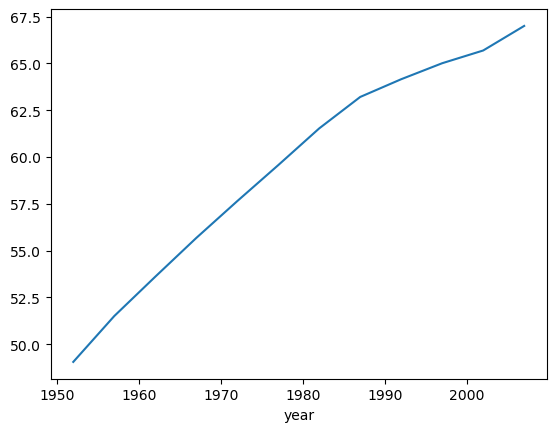

In [6]:
# Plotagem simples
import matplotlib.pyplot as plt 
global_yearly_life_expectancy.plot()
plt.show()